# PET OWNERSHIP VS MEAT CONSUMPTION
- Anand Mahadevan
-Arzhang Valadkhani
-Brent Sakihara
-Aaron Liu
-Omar Ochoa

1) What information do we have?
- Person gender, num. pets owned, the types of pets owned, the types of meat eaten, reason for not eating atleast one type of meat.

2) What would you like to know?
- We would like to know about pet ownership rate, meat consumption rate, and gender related to both those variables.

Answer Questions 1, 2.
• Question3: Explain what you are computing (mean, SD, ...), and then
compute using Python. Create some visualizations (at least 5, and at least 3
must be of different types).
• Answer Question 4. State clearly each of your hypotheses (at least 3).
• Question 5: Test your hypotheses and predictions (use at least 3 different
tests). For each: describe the method you are using; perform it; analyze
the results and draw the conclusion.

In [1]:
from scipy.stats import chi2_contingency
import pandas as pd
df = pd.read_csv("PetVsMeat.csv")
#data collected from PHYS040B class, CS105 (us), and CS111

# VISUALIZATIONS START HERE

0.8363636363636363
AxesSubplot(0.125,0.125;0.775x0.755)


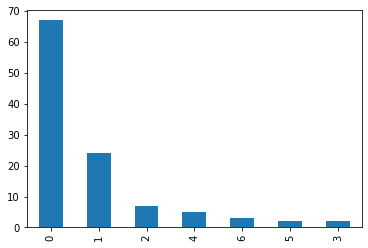

In [2]:
# Frequency of Pets owned
numpet = df["NumPets"]
#print(numpet)
print(numpet.mean())
print(numpet.value_counts().plot.bar())

# Conclusion.. It appears as though the vast majority of people surveyed do not own a pet. The mean number of pets owned is 0.8.

<AxesSubplot:ylabel='TypeMeat'>

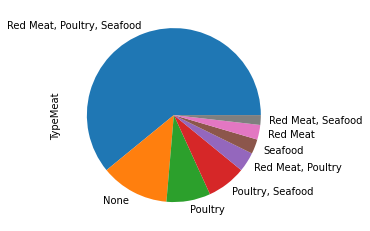

In [3]:
#pie chart visualization of the distribution of meats that the sample has eaten
df["TypeMeat"].value_counts().plot(kind="pie")

# Conclusion... The majority of people surveyed eat all types of meat, the highest being Vegetarian (None), and just poultry third.

<AxesSubplot:ylabel='NoMeatReason'>

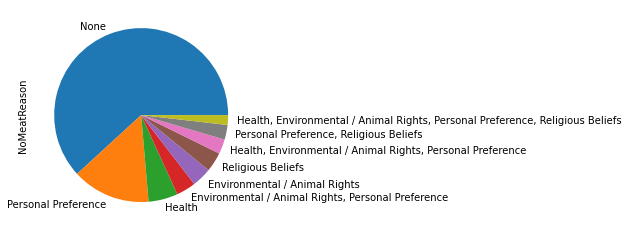

In [4]:
# Pie chart of No Meat Reason
NoMeatReason = df["NoMeatReason"]
NoMeatReason.value_counts().plot.pie()

# Conclusion.. The largest reason why people don't eat atleast one type of meat is Personal Preference. The majority of people don't have a reason to not eat meat because they eat all types of meat.

<AxesSubplot:xlabel='Gender'>

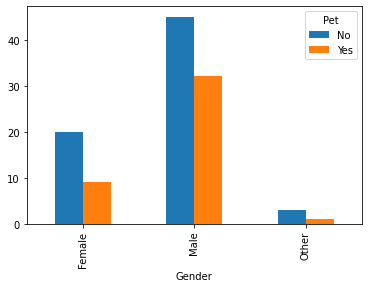

In [5]:
#bar graph of the pet ownership by each gender
pd.crosstab(df["Gender"], df["Pet"]).plot(kind="bar")

# Conclusion.. For every gender, there are more people who don't own a pet than people who do. It appears, however, that there is a larger % of male people who do own a pet, than female people who own a pet.

TypeMeat,None,Poultry,"Poultry, Seafood",Red Meat,"Red Meat, Poultry","Red Meat, Poultry, Seafood","Red Meat, Seafood",Seafood
Gender,,,,,,,,
Female,8,2,3,0,0,15,0,1
Male,5,7,5,3,3,51,2,1
Other,1,0,0,0,1,1,0,1


<AxesSubplot:xlabel='Gender'>

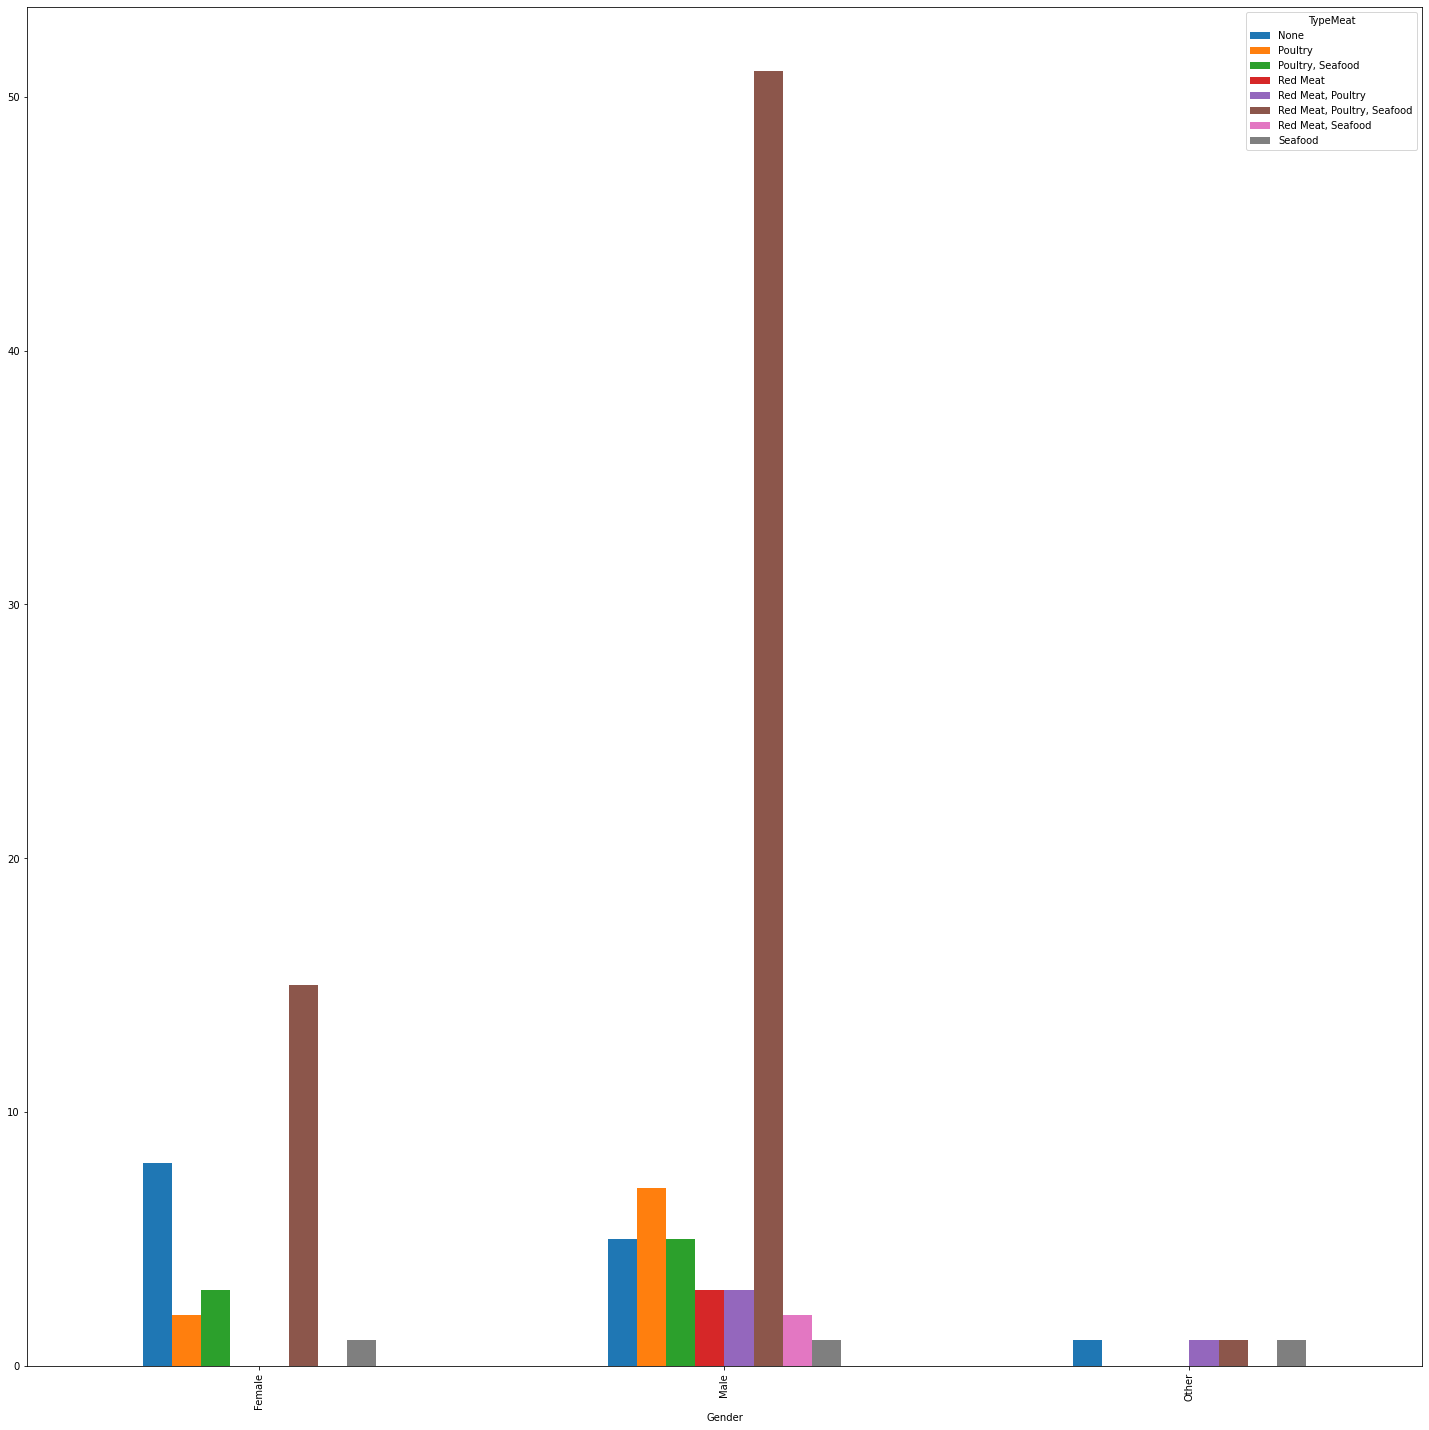

In [6]:
# Visualization of Gender vs Meat Type
gender_meat = pd.crosstab(df['Gender'], df['TypeMeat'])
display(gender_meat)
gender_meat.plot.bar(figsize = (25,25))

# Conclusion... There is an overwhemingly large amount of males who eat all types of meat. In terms of females, while the greatest category was also eating all types of meat, there was a noticable secondary category of vegetarian females.

NoMeatReason,Environmental / Animal Rights,"Environmental / Animal Rights, Personal Preference",Health,"Health, Environmental / Animal Rights, Personal Preference","Health, Environmental / Animal Rights, Personal Preference, Religious Beliefs",None,Personal Preference,"Personal Preference, Religious Beliefs",Religious Beliefs
Gender,,,,,,,,,
Female,4,2,2,2,1,10,5,1,2
Male,0,1,3,1,1,57,10,2,2
Other,0,1,1,0,0,1,1,0,0


<AxesSubplot:xlabel='Gender'>

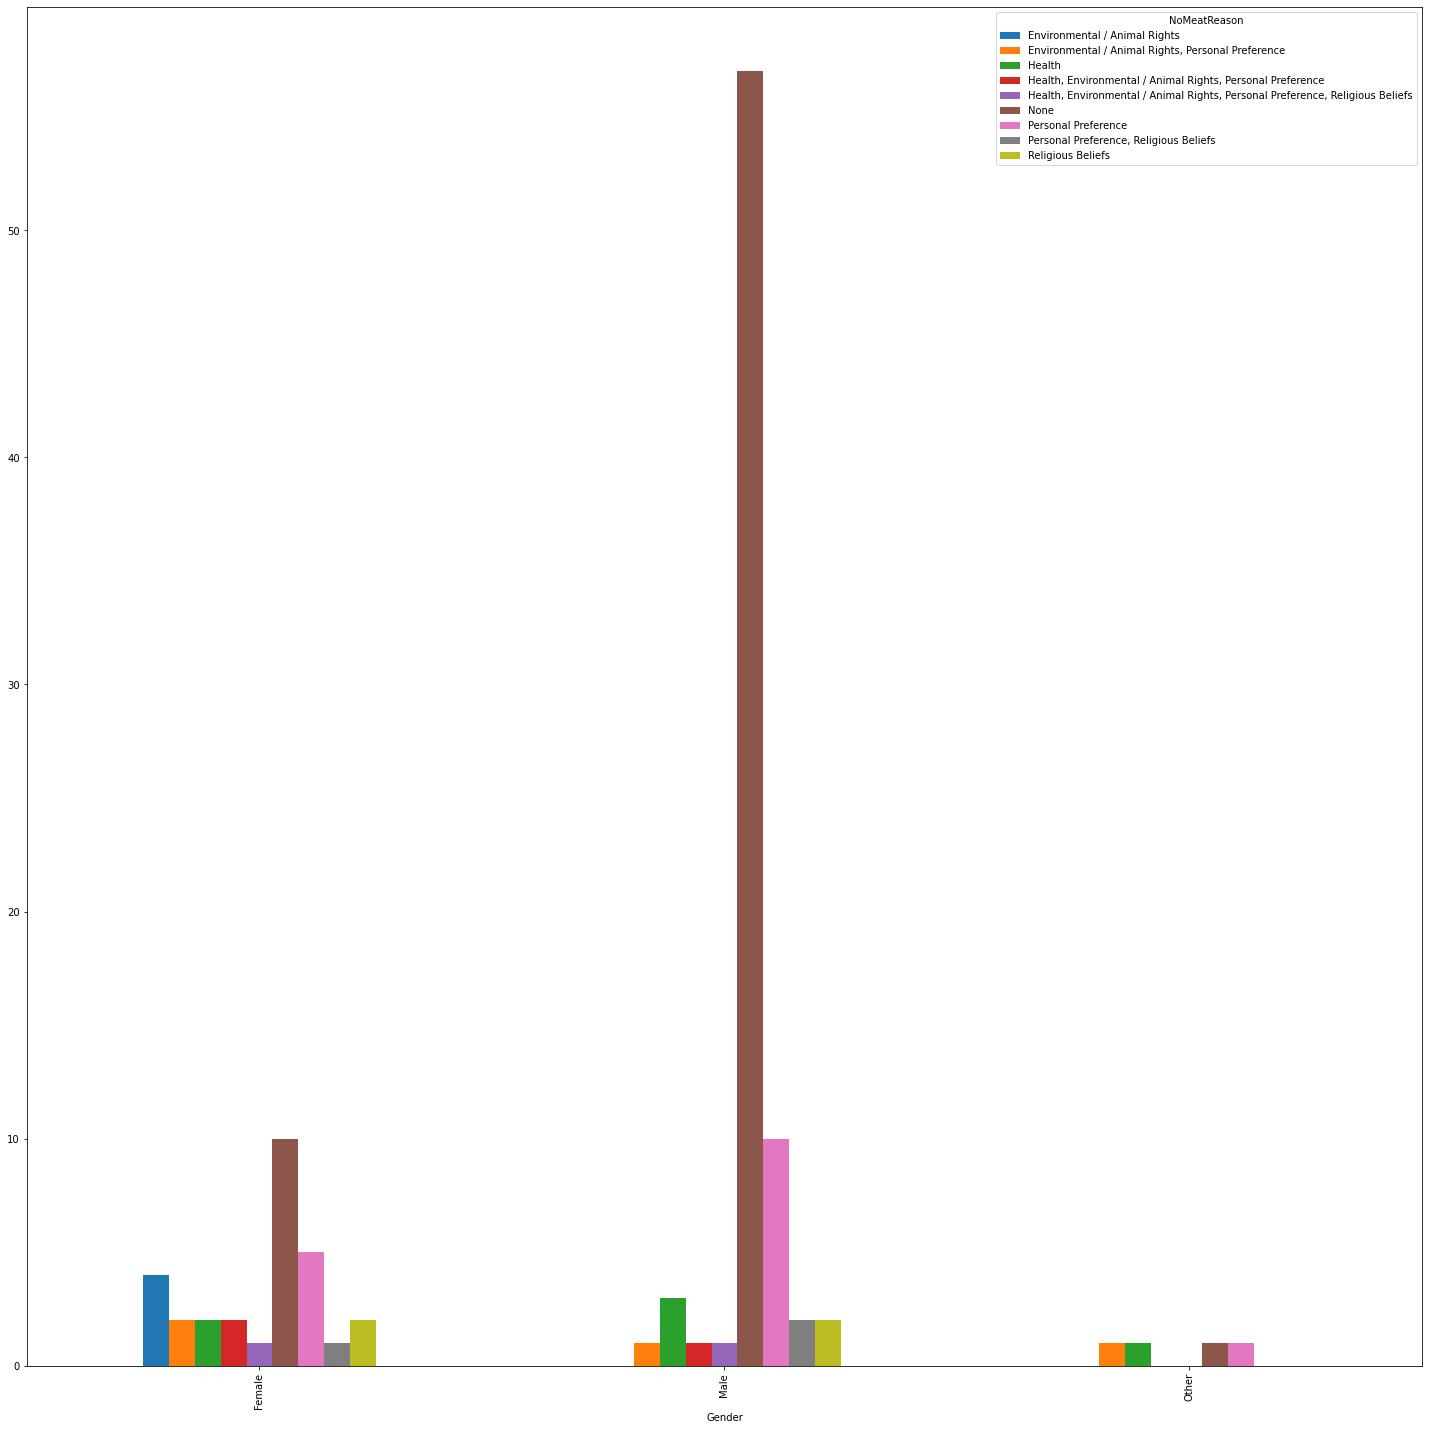

In [7]:
# Visualization of Gender vs NoMeatReason
gender_nomeat = pd.crosstab(df['Gender'], df['NoMeatReason'])
display(gender_nomeat)
gender_nomeat.plot.bar(figsize = (25,25))

# Conclusion.. While the largest categories for both male and female are None, the secondary reason for both was Personal Preference for why they don't eat atleast one type of meat.

TypeMeat  None  Poultry  Poultry, Seafood  Red Meat  Red Meat, Poultry  \
Pet                                                                      
No          11        9                 6         1                  2   
Yes          3        0                 2         2                  2   

TypeMeat  Red Meat, Poultry, Seafood  Red Meat, Seafood  Seafood  
Pet                                                               
No                                34                  2        3  
Yes                               33                  0        0  
AxesSubplot(0.125,0.125;0.775x0.755)


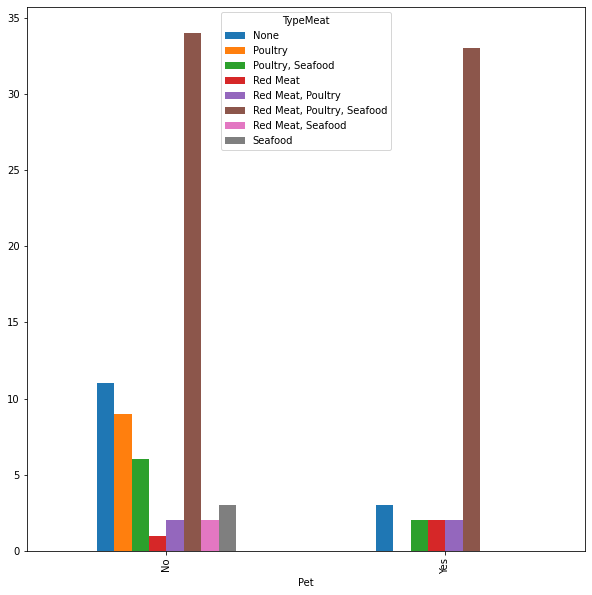

In [8]:
# Visualization of Pet Ownership vs. Type of Meat Consumption
pet_vs_type_meat = pd.crosstab(df["Pet"], df["TypeMeat"])
print(pet_vs_type_meat)
print(pet_vs_type_meat.plot(kind='bar', figsize = (10,10)))

# Conclusion... Regardless of Pet Ownership, it appears that the largest category is eating all types of meat; even the counts of people who eat all types of meat are equal. However, of the people that don't own atleast one pet, there is a greater diversity in terms of the combinations of meat that people eat. 

NoMeatReason  Environmental / Animal Rights  \
Pet                                           
No                                 0.058824   
Yes                                0.000000   

NoMeatReason  Environmental / Animal Rights, Personal Preference    Health  \
Pet                                                                          
No                                                     0.044118   0.058824   
Yes                                                    0.023810   0.047619   

NoMeatReason  Health, Environmental / Animal Rights, Personal Preference  \
Pet                                                                        
No                                                     0.029412            
Yes                                                    0.023810            

NoMeatReason  Health, Environmental / Animal Rights, Personal Preference, Religious Beliefs  \
Pet                                                                                           
No 

<AxesSubplot:xlabel='Pet'>

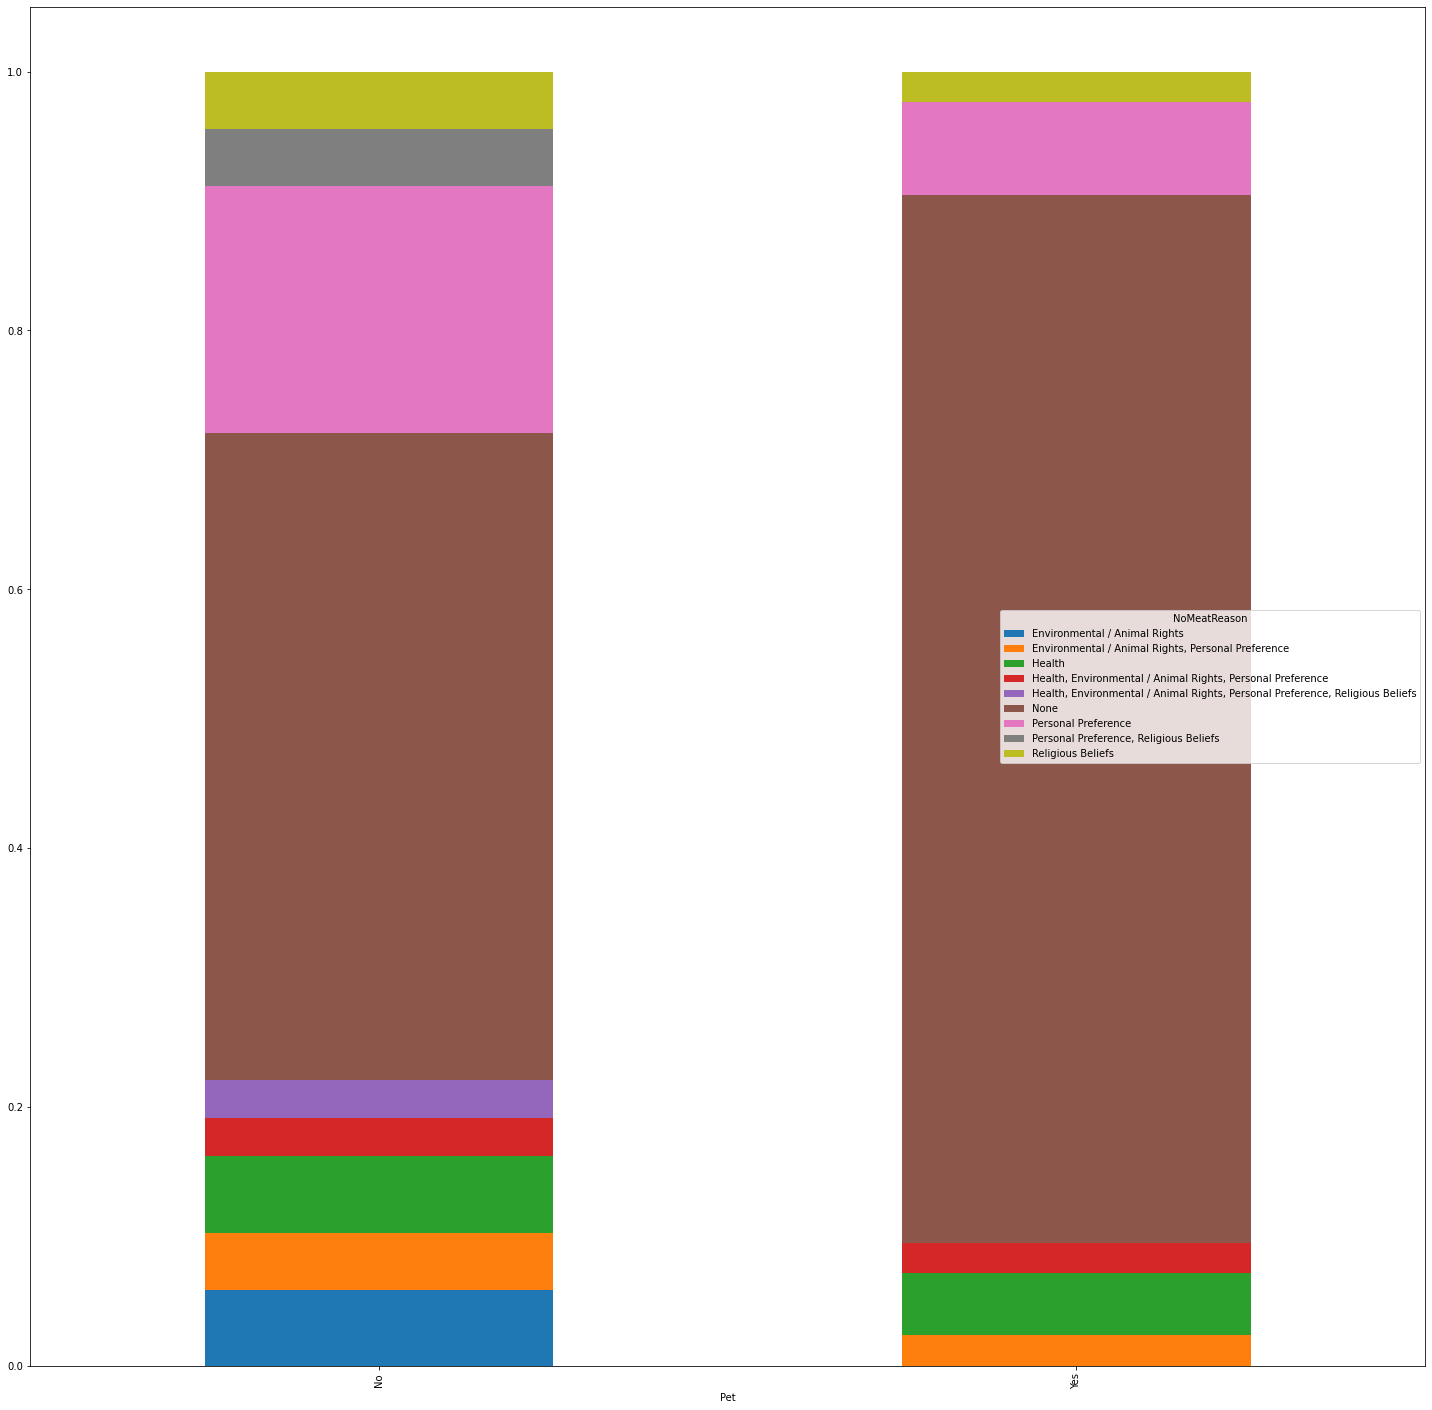

In [9]:
# Visualization of Given Pet Distrivbution, distribution of NoMeatReason?
contTable = pd.crosstab(df["Pet"], df["NoMeatReason"])
TypeMeat_counts = contTable.sum(axis = 1)
NumPets_given_TypeMeat = contTable.divide(TypeMeat_counts, axis=0)
print(NumPets_given_TypeMeat)
NumPets_given_TypeMeat.plot.bar(stacked=True, figsize = (25,25))

# Conclusion.. Regardless of Pet ownership, the largest category was None. However, of the non-pet owners, Personal Preference was the second largest reason by far for why they didn't eat atleast one type of meat.

TypeMeat      None   Poultry  Poultry, Seafood  Red Meat  Red Meat, Poultry  \
NumPets                                                                       
0         0.164179  0.134328          0.089552  0.014925           0.029851   
1         0.000000  0.000000          0.083333  0.041667           0.083333   
2         0.000000  0.000000          0.000000  0.142857           0.000000   
3         0.500000  0.000000          0.000000  0.000000           0.000000   
4         0.200000  0.000000          0.000000  0.000000           0.000000   
5         0.500000  0.000000          0.000000  0.000000           0.000000   
6         0.000000  0.000000          0.000000  0.000000           0.000000   

TypeMeat  Red Meat, Poultry, Seafood  Red Meat, Seafood   Seafood  
NumPets                                                            
0                           0.492537           0.029851  0.044776  
1                           0.791667           0.000000  0.000000  
2               

<AxesSubplot:xlabel='NumPets'>

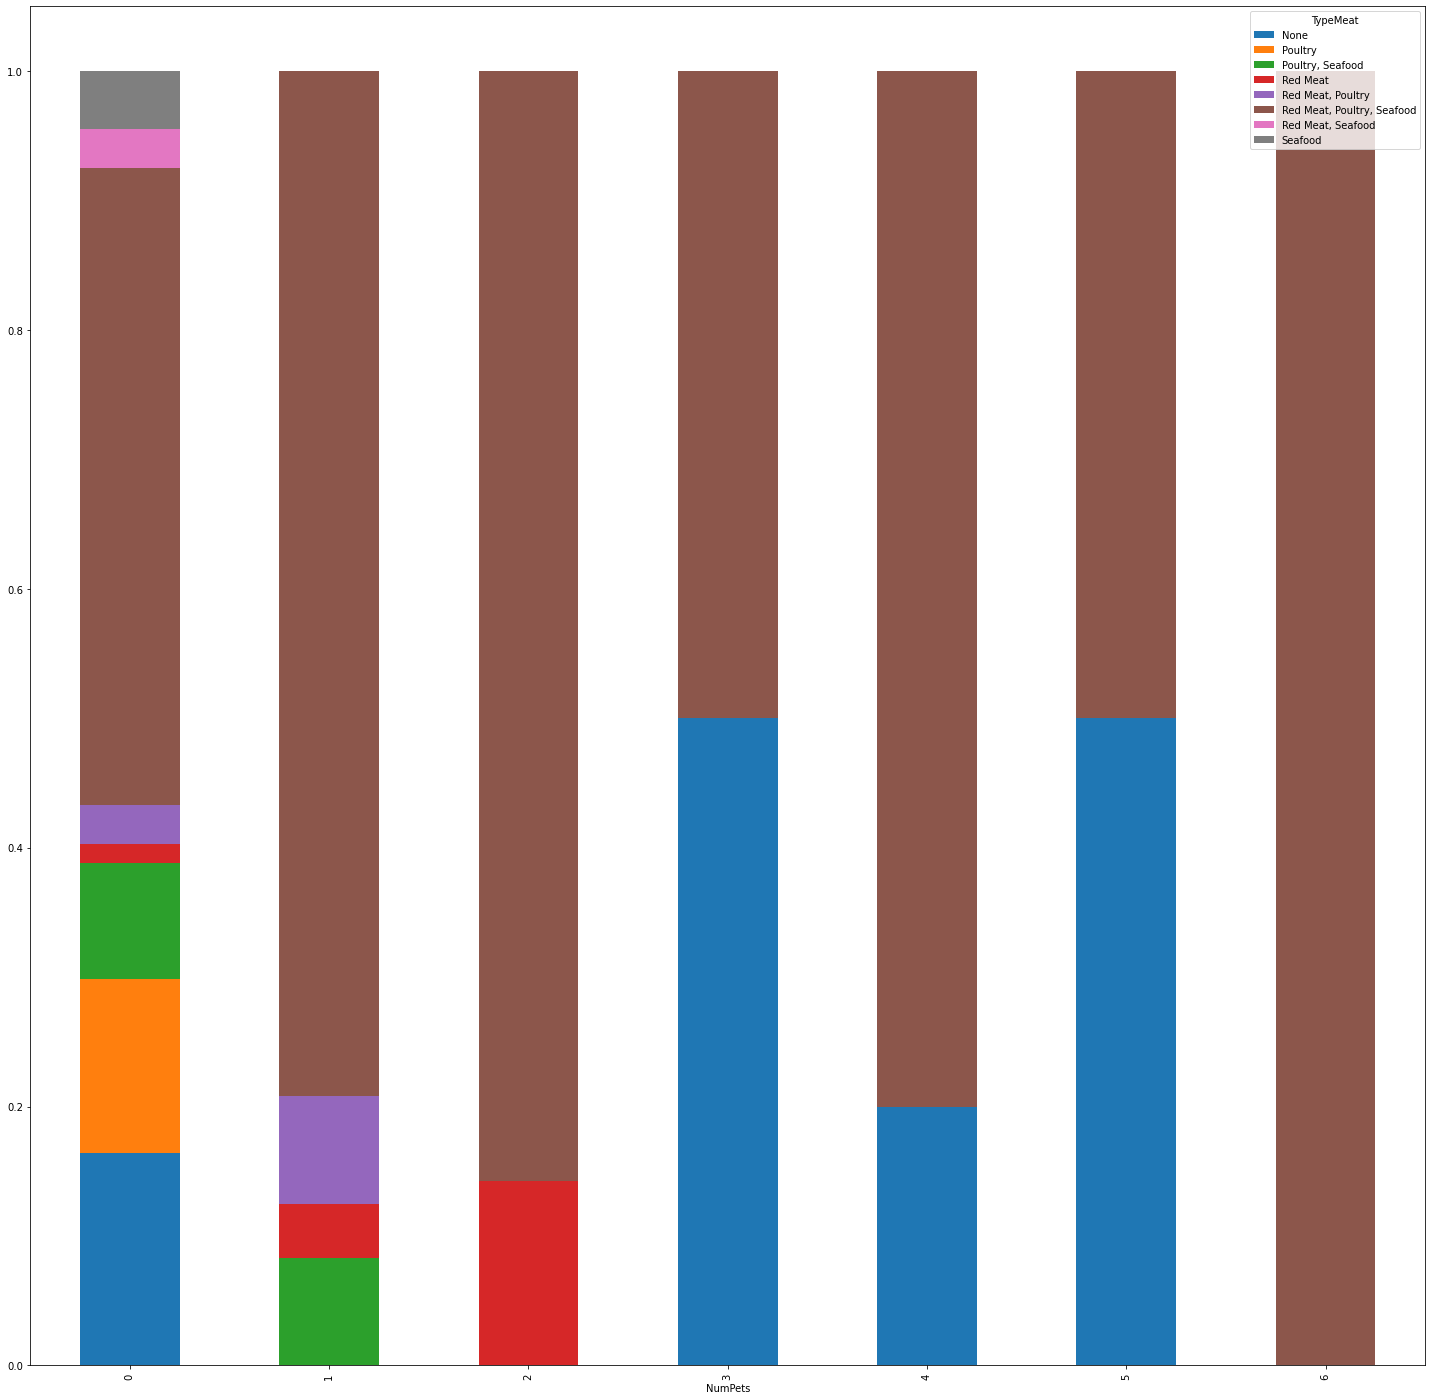

In [10]:
# Visualization Given NumPets, distribution of meat eaten? Anand Mahadevan
contTable = pd.crosstab(df["NumPets"], df["TypeMeat"])
TypeMeat_counts = contTable.sum(axis = 1)
NumPets_given_TypeMeat = contTable.divide(TypeMeat_counts, axis=0)
print(NumPets_given_TypeMeat)
NumPets_given_TypeMeat.plot.bar(stacked=True, figsize = (25,25))


# Conclusion.. Of all of the categories of NumPets, eating all types of meat was the largest % or 50% in the case for NumPets 3 and 5. The most diversity of types of meat combinations is in NumPets == 0.

# TESTS START HERE

# Chi_Test by hand using this mock data - Anand Mahadevan
- H0: Pet Ownership and the Type of Meat(s) eaten are independent.
- Ha: Pet Ownership and the Type of Meat(s) eaten are correlated.
- Significance Leve: 0.05
- Pet row, Type Meat Column
-            Poultry    Poultry,Red Meat    None   Total
- Yes Pet      10           15                7      32
- No Pet       3             8                10     21
- Total        13            23               17     53
- Total num. people = 53

- Expected Matrix = [7.8491, 13.887, 10.264; 5.1509, 9.1132, 6.7358]

- X^2 = (10 - 7.8491)^2/7.8491 + (15 - 13.887)^2/13.887 + (7-10.264)^2/10.264 + (3-5.1509)^2/5.1509 + (8-9.1132)^2/9.1132 + (10-6.7358)^2/6.7358 = 4.332692776
- Degrees of Freedom: (2-1)(3-1) = 2
- p-value = 0.1146

- So, in conclusion, with a significance level of 0.05, there is insufficient evidence to reject H0. Pet Ownership and the Type of Meat(s) eaten are independent.

In [11]:
#Chi-Square Pet Yes No vs. Meat Meat Type
pet_and_meat = pd.crosstab(df["Pet"], df["TypeMeat"])
chi2_contingency(pet_and_meat)
# in order: X^2, p-value, degrees of freedom, expected value matrix

(15.648478296791355,
 0.028529290568053062,
 7,
 array([[ 8.65454545,  5.56363636,  4.94545455,  1.85454545,  2.47272727,
         41.41818182,  1.23636364,  1.85454545],
        [ 5.34545455,  3.43636364,  3.05454545,  1.14545455,  1.52727273,
         25.58181818,  0.76363636,  1.14545455]]))

# Conclusion...
- Prediction: Based on the visualization of Pet and TypeMeat above, I predict my null hypothesis to be rejected as there are a lot of categories in the no pet column of meat that aren't being represented in the yes meat column.
- H0: Pet Ownership and the Type of Meat(s) eaten are independent.
- Ha: Pet Ownership and the Type of Meat(s) eaten are correlated.
- Significance Leve: 0.05
- So, in conclusion, with a significance level of 0.05, there is sufficient evidence to reject H0. Pet Ownership and the Type of Meat(s) eaten are correlated.

# One-Sample t-test by hand using this mock data - Arzhang
- H0: The mean number of pets owned by people is 0.5.
- HA: The mean number of pets owned by people is not 0.5.
- pet data: [0,2,1,3,0,4,0,1]
- t = (mean - pop. mean) / (std. dev. / sqrt(n))
- t = (1.375 - 0.5) / (1.506/sqrt(8)) = 1.6434
- Degrees of Freedom = n - 1 = 7
- p = 0.144
- So, in conclusion, with a significance level of 0.05, there is insufficient evidence to reject H0. The mean number of pets owned by people is 0.5.

In [12]:
#One-Sample t-test for NumPets
from scipy import stats
num_of_pets  = df["NumPets"]
stats.ttest_1samp(num_of_pets, popmean=0.5)

Ttest_1sampResult(statistic=2.423044399336984, pvalue=0.017038294140848544)

# Conclusion...
- Prediction: Based on the visualization of NumPets above, I predict my null hypothesis to be rejected because of the large amount of people in the 0 category.
- H0: The mean number of pets owned by people is 0.5.
- HA: The mean number of pets owned by people is not 0.5.
- Significance Leve: 0.05
- So, in conclusion, with a significance level of 0.05, there is sufficient evidence to reject H0. The true mean of pets owned is not 0.5.

# Binomial Test by hand using this mock data - Aaron
- No more than 10% of pet owners don't eat meat
- n = number of trials
- k = number of successes
- p = probability of success for a single trial 

- formula: P(B=k) = (n!/(k!(n-k)!) * p^k (1-p)^(n-k)

- H0: No more than 10% of pet owners are non-meat consumers.
- HA: More than 10% of pet owners are non-meat consumers.
                   
- Out of 88 pet owners we found that 11 of them did not eat meat.
- n = 88
- k = 11
- p = 0.1

- P(B=k) = (88!/(11!(88-11)!) * 0.1^11 (1-0.1)^(88-11)
- = 0.095 
- this is the the probaility for exactly 11 out of 88 people
- The probability of exactly, or more than, 11 out of 88 people is 0.263

- So we fail to reject the reject the null hypothesis. No more than 10% of pet owners are non-meat consumers.

In [13]:
#binomial test
#no more than 10% of pet owners don't eat meat
from scipy.stats import binom_test
df['Meat'] = 0
df.loc[(df['TypeMeat'] == 'Poultry') | (df['TypeMeat'] == 'Red Meat')| (df['TypeMeat'] == 'Seafood')| (df['TypeMeat'] == 'Poultry, Seafood')| (df['TypeMeat'] == 'Red Meat, Poultry, Seafood')| (df['TypeMeat'] == 'Red Meat, Poultry')| (df['TypeMeat'] == 'Red Meat, Seafood'), "Meat"] = 1 
display(df.groupby("Pet")['Meat'].value_counts())
binom_test(x = 3, n = 42, p = 0.1, alternative='greater')

Pet  Meat
No   1       57
     0       11
Yes  1       39
     0        3
Name: Meat, dtype: int64

0.8048923451730632

# Conclusion...
- Prediction: I predict that there will be not enough evidence to reject the null hypothesis because 10% of 39 is very close to 3.
- H0: No more than 10% of pet owners are non-meat consumers.
- HA: More than 10% of pet owners are non-meat consumers.
- So, in conclusion, with a significance level of 0.05, there is not sufficient evidence to reject H0. No more than 10% of pet owners are non-meat consumers.